# Pulling Budget information from Jerry's code.

### Importing Libraries and setting Seaborn Visualize to teams standards

In [1]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = sqlite3.connect("Prebuilt_stuff/data/movies.db")
sns.set_style('whitegrid')
sns.set_context("talk")

## Attempting to use merging code to make budget graphs from my Rotten Tomatoes data

### Importing Jerry's code

In [2]:
#csv created from Jerry's Branch for total budgets
budget_main = pd.read_csv("Prebuilt_stuff/data/main_data_compilation.csv")

In [3]:
budget_main.drop(columns='Unnamed: 0', inplace=True)

In [4]:
#Filtering the titles to ensure the inner merge would find similar titles
budget_main["title"] = budget_main["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
clean_budget_main = budget_main.drop_duplicates("title")

<ipython-input-4-3e796650a9f1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  budget_main["title"] = budget_main["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()


Importing my previous work into this folder for merging

In [5]:
clean_title = pd.read_csv("Prebuilt_stuff/data/rotten_tomatoes_clean_titles.csv")

In [6]:
#Previous csv was an outer merge with an indicator to help understand how many where created and lost.
clean_title = clean_title.loc[clean_title['where'].apply(lambda x: x == "both")].copy()

In [7]:
clean_title.columns

Index(['Unnamed: 0', 'title', 'production_company', 'audience_status',
       'audience_rating', 'audience_count', 'clean_titles', 'where'],
      dtype='object')

In [8]:
clean_title.drop(columns=['Unnamed: 0','where','clean_titles'], inplace=True)

In [9]:
#Workable dataframe
clean_title

,title,production_company,audience_status,audience_rating,audience_count
2,iron_man_2,Paramount Studios,Upright,71.0,480879.0
3,toy_story,Buena Vista,Upright,92.0,1109209.0
4,inception,Warner Bros. Pictures,Upright,91.0,571078.0
5,percy_jackson___the_olympians__the_lightning_t...,20th Century Fox,Spilled,53.0,254421.0
6,avatar,20th Century Fox,Upright,82.0,1382566.0
...,...,...,...,...,...
24760,the_bubble,Strand Releasing,Upright,84.0,4672.0
24812,time_for_ilhan,Gooddocs,Spilled,42.0,61.0
24817,undiscovered,Lions Gate Films,Spilled,48.0,9311.0
24905,hari_kondabolu__warn_your_relatives,Netflix,Spilled,53.0,21.0


In [10]:
rotten_budget_df = clean_budget_main.merge(clean_title, on=["title"], how="inner").copy()

In [11]:
rotten_budget_df

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,production_company,audience_status,audience_rating,audience_count
0,28.515,iron_man_2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111,Paramount Studios,Upright,71.0,480879.0
1,27.920,inception,8.3,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,Warner Bros. Pictures,Upright,91.0,571078.0
2,26.691,percy_jackson___the_olympians__the_lightning_t...,6.1,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,20th Century Fox,Spilled,53.0,254421.0
3,26.526,avatar,7.4,18676,138202.4,93.0,Horror,425000000,2776345279,2351345279,2009-12-18,653.257713,20th Century Fox,Upright,82.0,1382566.0
4,24.445,toy_story_3,7.7,8340,64218.0,103.0,Adventure,200000000,1068879522,868879522,2010-06-17,534.439761,Walt Disney Pictures,Upright,89.0,607537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,1.836,bad_company,10.0,1,10.0,87.0,Thriller,70000000,69157016,-842984,2018-08-14,98.795737,Buena Vista Pictures,Spilled,31.0,5713.0
1589,1.836,bad_company,10.0,1,10.0,87.0,Thriller,70000000,69157016,-842984,2018-08-14,98.795737,Touchstone Pictures,Spilled,35.0,56694.0
1590,1.400,molly,5.8,5,29.0,91.0,Action,21000000,17396,-20982604,2018-09-25,0.082838,MGM Home Entertainment,Spilled,53.0,2101.0
1591,0.840,the_box,8.0,1,8.0,89.0,Drama,25000000,34356760,9356760,2018-03-04,137.427040,Warner Bros. Pictures,Spilled,24.0,359098.0


In [12]:
clean_unique_titles = rotten_budget_df.drop_duplicates("title")
clean_unique_titles

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,production_company,audience_status,audience_rating,audience_count
0,28.515,iron_man_2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111,Paramount Studios,Upright,71.0,480879.0
1,27.920,inception,8.3,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,Warner Bros. Pictures,Upright,91.0,571078.0
2,26.691,percy_jackson___the_olympians__the_lightning_t...,6.1,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,20th Century Fox,Spilled,53.0,254421.0
3,26.526,avatar,7.4,18676,138202.4,93.0,Horror,425000000,2776345279,2351345279,2009-12-18,653.257713,20th Century Fox,Upright,82.0,1382566.0
4,24.445,toy_story_3,7.7,8340,64218.0,103.0,Adventure,200000000,1068879522,868879522,2010-06-17,534.439761,Walt Disney Pictures,Upright,89.0,607537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2.919,little_women,6.8,11,74.8,112.0,Drama,15000000,50003303,35003303,2018-09-28,333.355353,WARNER BROTHERS PICTURES,Upright,78.0,9776.0
1587,1.836,bad_company,10.0,1,10.0,87.0,Thriller,70000000,69157016,-842984,2018-08-14,98.795737,Paramount Pictures,Upright,71.0,2298.0
1590,1.400,molly,5.8,5,29.0,91.0,Action,21000000,17396,-20982604,2018-09-25,0.082838,MGM Home Entertainment,Spilled,53.0,2101.0
1591,0.840,the_box,8.0,1,8.0,89.0,Drama,25000000,34356760,9356760,2018-03-04,137.427040,Warner Bros. Pictures,Spilled,24.0,359098.0


In [13]:
#Break down of information that was not neccesary to my questions.
production_company = clean_unique_titles.drop(columns=["vote_average", "vote_count","vote_total","popularity","runtime_minutes","release_date", "audience_status","audience_rating","audience_count"]).copy()
production_company

,title,genre,production_budget,worldwide_gross,worldwide_profit,percent_returns,production_company
0,iron_man_2,Action,170000000,621156389,451156389,365.386111,Paramount Studios
1,inception,Action,160000000,835524642,675524642,522.202901,Warner Bros. Pictures
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,95000000,223050874,128050874,234.790394,20th Century Fox
3,avatar,Horror,425000000,2776345279,2351345279,653.257713,20th Century Fox
4,toy_story_3,Adventure,200000000,1068879522,868879522,534.439761,Walt Disney Pictures
...,...,...,...,...,...,...,...
1584,little_women,Drama,15000000,50003303,35003303,333.355353,WARNER BROTHERS PICTURES
1587,bad_company,Thriller,70000000,69157016,-842984,98.795737,Paramount Pictures
1590,molly,Action,21000000,17396,-20982604,0.082838,MGM Home Entertainment
1591,the_box,Drama,25000000,34356760,9356760,137.427040,Warner Bros. Pictures


In [14]:
clean_unique_titles.shape

(1428, 16)

In [15]:
#Cleaning Solo Production Companies to be countable
production_company["production_company"] = production_company["production_company"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
# merging different Production Companies into a single respective title
pc = production_company.copy()
# {'a': {'b': np.nan}}
pc.replace({"production_company" : {"paramount_studios": 'paramount','paramount_pictures':'paramount','paramount_home_video':'paramount','paramount_classics':'paramount', 
                                    'warner_bros__pictures':'warner_brothers','warner_home_video':'warner_brothers','warner_brothers_pictures':'warner_brothers','warner_bros_':'warner_brothers','warner_bros__animation':'warner_brothers','warner_bros_pictures':'warner_brothers',
                                    '20th_century_fox':'fox','fox_searchlight':'fox','fox_searchlight_pictures':'fox','twentieth_century_fox':'fox','twentieth_century_fox':'fox','twentieth_century_fox_home_entertainment':'fox','20th_century_fox_film_corporation':'fox','fox_searchlight_pictures__film4_and_waypoint':'fox',
                                    'walt_disney_pictures':'disney', 'walt_disney_studios':'disney', 'walt_disney_productions':'disney','walt_disney_animation_studios':'disney','marvel_studios':'disney',
                                    'lionsgate_films':'lionsgate', 'lions_gate_films':'lionsgate','lionsgate_fi_lms':'lionsgate','lionsgate_entertainment':'lionsgate','lionsgate_pictures':'lionsgate','lions_gate_releasing':'lionsgate','lionsgate_premiere':'lionsgate','lionsgate_and_cbs_films':'lionsgate', 'lionsgate_and_roadside_attractions':'lionsgate',
                                    'sony_pictures':'sony', 'sony_pictures_classics':'sony','sony_classics':'sony','sony_pictures_columbia':'sony','sony_pictures_home_entertainment':'sony','sony_screen_gems':'sony','sony_pictures_entertainment':'sony', 'sony_films':'sony', 'sony_pictures_animation':'sony',
                                    'mgm_home_entertainment':'mgm', 'mgm_pictures':'mgm','amazon_studios_and_roadside_attractions':'amazon_studios','paladin_films':'paladin','the_weinstein_company':'weinstein_company','the_weinstein_co_':'weinstein_company','ifc_midnight':'ifc','ifc_films':'ifc',
                                    'dreamworks_skg':'dreamworks_studios', 'dreamworks_pictures':'dreamworks_studios','dreamworks_animation':'dreamworks_studios','dreamworks':'dreamworks_studios',
                                    'universal_pictures':'universal', 'universal_studios':'universal','mca_universal_home_video':'universal','universal_classics':'universal',
                                   }}, inplace=True)

<ipython-input-15-11bbd07b284b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  production_company["production_company"] = production_company["production_company"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()


array(['paramount_studios', 'warner_bros__pictures', '20th_century_fox',
       'walt_disney_pictures', 'universal_pictures', 'film_chest',
       'lionsgate_films', 'summit_entertainment', 'paramount_pictures',
       'columbia_pictures', 'buena_vista_pictures', 'paramount',
       'walt_disney_studios', 'sony_pictures', 'slamdance_on_the_road',
       'fox_searchlight', 'magnolia_pictures', 'paramount_home_video',
       'anchor_bay_films', 'lionsgate', 'universal_studios',
       'overture_films', 'screen_gems', 'warner_home_video',
       'koch_vision', 'media_home_entertainment', 'touchstone_pictures',
       'sony_pictures_classics', 'mgm', 'fox_searchlight_pictures',
       'focus_features', 'drafthouse_films', 'roadside_attractions',
       'new_line_cinema', 'anchor_bay', 'united_artists', 'ato_pictures',
       'sony_classics', 'freestyle_releasing', 'weinstein_company', 'ifc',
       'lorimar_productions', 'yari_film_group', 'magnolia_releasing',
       's_ville_pictures', '

In [17]:
#Filter by the Adventure Genre
adventure = pc[pc['genre']==("Adventure")]
adventure.shape

(140, 7)

In [18]:
#Reseting Production Company to be graphable
adventure_graph = adventure["production_company"].str.replace("_"," ").str.title()
adventure_graph

2                           Fox
4                        Disney
6                    Film Chest
11                       Disney
12         Summit Entertainment
                 ...           
1561         Annapurna Pictures
1567                  Paramount
1571                     Disney
1573               Affirm Films
1580    Fun Academy Media Group
Name: production_company, Length: 140, dtype: object

In [19]:
#Making top 5 for Graphing
top_5_adventure_pc = adventure_graph.value_counts().head()
top_5_adventure_pc

Fox                26
Disney             19
Warner Brothers    15
Universal          13
Paramount          11
Name: production_company, dtype: int64

In [40]:
#Sorting production companies by those who have made 5 or more movies
df_work = adventure.groupby("production_company").count().reset_index()
companies = list(df_work.loc[df_work["title"] >= 5]["production_company"])
adventure_pc_5_Movies = adventure.loc[adventure["production_company"].isin(companies)].copy()

In [41]:
#Taking the top 50 total profits
pc_wwp = adventure_pc_5_Movies.sort_values("worldwide_profit", ascending=False).head(50).copy()
pc_wwp["Production Company"] = pc_wwp["production_company"].str.replace("_"," ").str.title()

In [24]:
rotten_budget_df2 = rotten_budget_df.sort_values("worldwide_profit", ascending=False).head(50).copy()

In [25]:
rotten_budget_df1 = rotten_budget_df.sort_values("percent_returns", ascending=False).head(50).copy()

In [26]:
rotten_budget_df2.describe()

,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns,audience_rating,audience_count
count,50.000000,50.000000,50.000000,50.000000,50.00000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,23.781440,6.752000,8091.180000,58751.326000,121.54000,1.776320e+08,1.112009e+09,9.343765e+08,709.371621,72.860000,2.485962e+05
std,15.431823,1.009595,5549.782922,43169.452998,25.42874,7.199050e+07,3.444679e+08,3.007763e+08,302.300022,20.148439,2.955393e+05
min,2.058000,4.300000,6.000000,25.800000,64.00000,5.500000e+07,7.866806e+08,6.669800e+08,378.231048,15.000000,3.990000e+02
25%,16.689500,6.300000,5035.000000,30891.925000,108.00000,1.350000e+08,8.818124e+08,7.389779e+08,512.745555,62.000000,4.328175e+04
50%,21.710500,6.900000,7684.000000,57505.800000,121.50000,1.750000e+08,1.025491e+09,8.445441e+08,630.476924,82.000000,1.340420e+05
75%,28.481000,7.500000,11327.500000,84677.000000,141.00000,2.000000e+08,1.229983e+09,1.058159e+09,782.275274,86.000000,3.540050e+05
max,80.773000,8.300000,22186.000000,184143.800000,169.00000,4.250000e+08,2.776345e+09,2.351345e+09,1627.246076,92.000000,1.382566e+06


In [27]:
rotten_budget_df1.describe()

,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns,audience_rating,audience_count
count,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,11.416400,6.250000,2453.280000,17170.806000,102.700000,7.024400e+06,1.654130e+08,1.583886e+08,3982.550675,60.220000,66629.380000
std,7.570463,1.194246,3011.844726,22740.643027,19.584719,1.071557e+07,1.957551e+08,1.854363e+08,5712.398300,20.601456,78496.661613
min,0.600000,2.000000,1.000000,2.000000,80.000000,1.000000e+05,2.769782e+06,2.669782e+06,1573.780000,22.000000,149.000000
25%,7.403750,5.500000,252.500000,1448.150000,87.000000,1.000000e+06,3.246614e+07,3.159114e+07,2000.413857,44.000000,22295.250000
50%,9.932500,6.200000,1227.500000,7355.850000,97.500000,3.000000e+06,9.497220e+07,9.097220e+07,2567.608892,61.500000,43790.500000
75%,15.948000,7.200000,3525.750000,23835.000000,111.750000,6.125000e+06,2.432859e+08,2.382822e+08,4093.531968,79.750000,86651.750000
max,37.197000,8.100000,10931.000000,79221.200000,160.000000,5.500000e+07,8.949853e+08,8.399853e+08,41656.474000,87.000000,469588.000000


# Graph time!

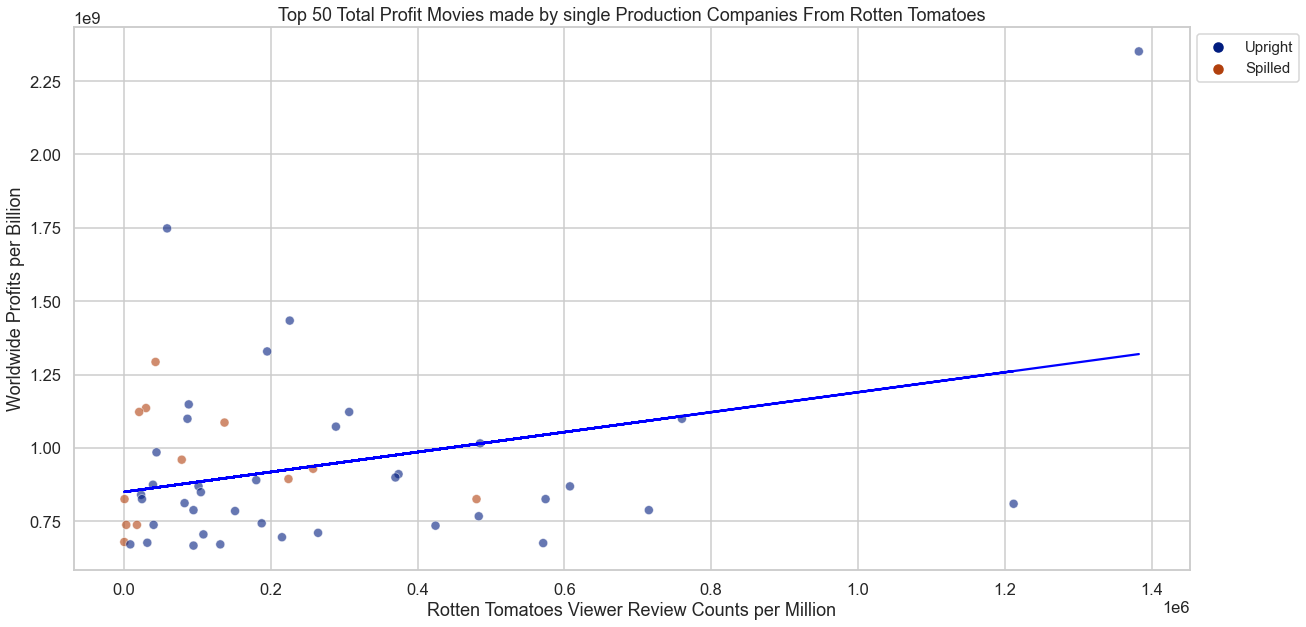

In [43]:
plt.figure(figsize=(20,10))
top_50_RT_profit_ar = sns.scatterplot(data=rotten_budget_df2, x="audience_count", y="worldwide_profit", hue="audience_status" ,palette="dark",alpha=0.6, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
top_50_RT_profit_ar.set(title="Top 50 Total Profit Movies made by single Production Companies From Rotten Tomatoes", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Worldwide Profits per Billion")
x = rotten_budget_df2["audience_count"]
y = rotten_budget_df2["worldwide_profit"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-");
# sns.lmplot(data = rotten_budget_df2, x =  "audience_rating", y ="worldwide_profit", legend = True, markers=".", line_kws={'color': 'red'})
# plt.savefig('Top_50_Total_Profit_Movies.png', dpi=300)

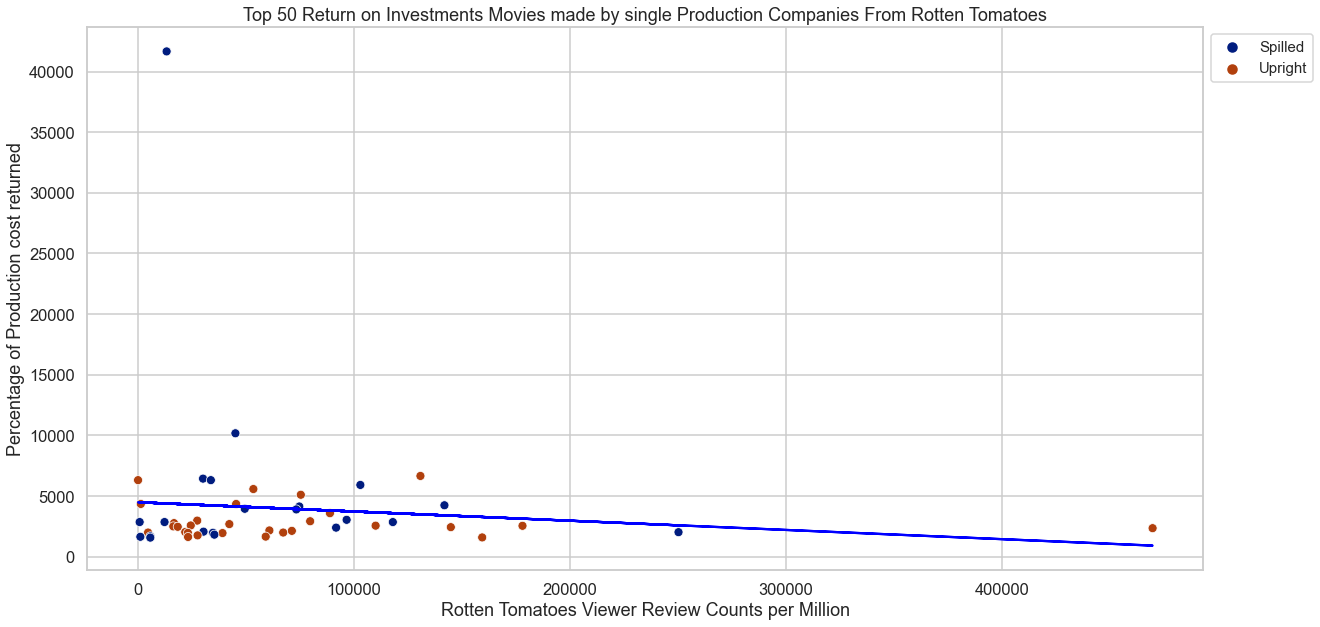

In [44]:
plt.figure(figsize=(20,10))
top_50_RT_profit_ar = sns.scatterplot(data=rotten_budget_df1, x="audience_count", y="percent_returns", hue="audience_status", palette="dark", sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
top_50_RT_profit_ar.set(title="Top 50 Return on Investments Movies made by single Production Companies From Rotten Tomatoes", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Percentage of Production cost returned")
# plt.ylim(0, 10000)
# plt.xlim(0, 400000)
x = rotten_budget_df1["audience_count"]
y = rotten_budget_df1["percent_returns"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-");

In [30]:
rotten_budget_df.value_counts("production_company").head(10)

production_company
Warner Bros. Pictures    124
Universal Pictures       117
20th Century Fox         116
Sony Pictures             86
Paramount Pictures        82
Walt Disney Pictures      58
Focus Features            45
The Weinstein Company     33
Open Road Films           31
Lionsgate Films           30
dtype: int64

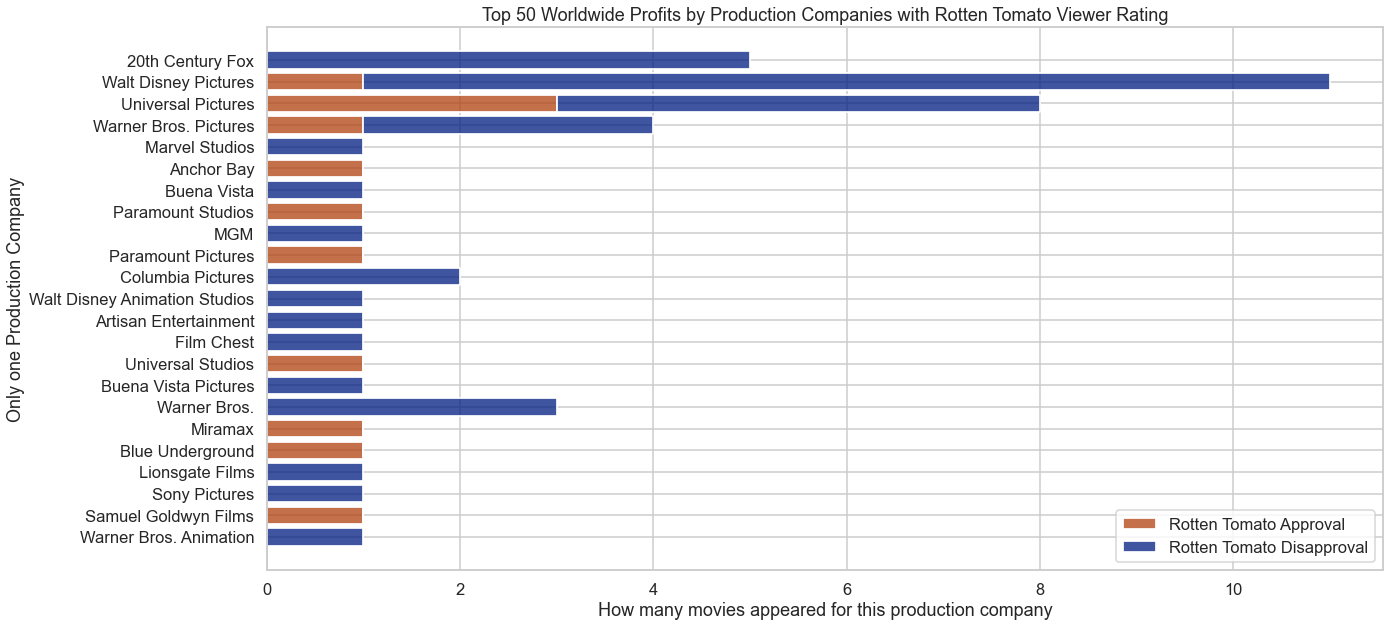

In [31]:
plt.figure(figsize=(20,10))
top_50_ProductionCompanies = sns.histplot(data=rotten_budget_df2, y="production_company", palette="dark", hue="audience_status", multiple="stack",shrink=.8)
top_50_ProductionCompanies.legend(labels=("Rotten Tomato Approval","Rotten Tomato Disapproval"))
top_50_ProductionCompanies.set(title="Top 50 Worldwide Profits by Production Companies with Rotten Tomato Viewer Rating", xlabel="How many movies appeared for this production company", ylabel="Only one Production Company");
# plt.savefig('Top_50_Worldwide_Profit_by_Production_Company_with_RT_Rating.png', dpi=300)

In [32]:
genre_cleaned = clean_unique_titles.loc[clean_unique_titles["genre"].apply(lambda x: (x=='Musical') | (x=='Action') | (x=='Adventure') | (x=='Animation')|(x=='Sci-Fi')|(x=='Family')|(x=='Fantasy'))].copy()
genre_cleaned_wwprofit = genre_cleaned.sort_values("worldwide_profit", ascending=False).head(100).copy()

<AxesSubplot:xlabel='genre', ylabel='worldwide_profit'>

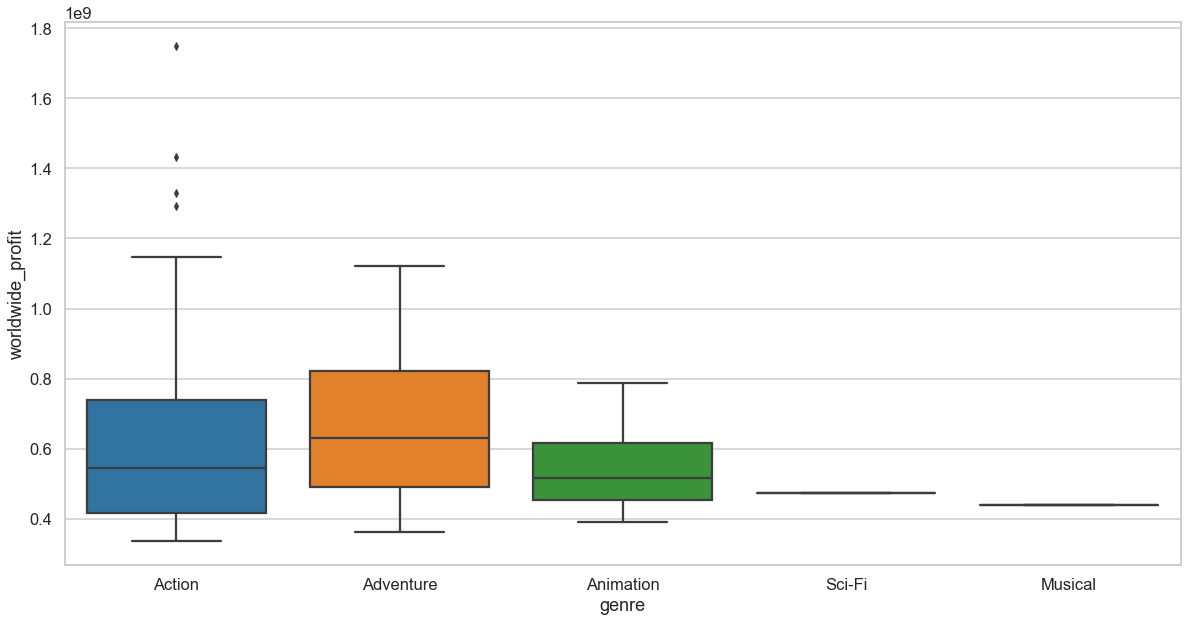

In [33]:
fig, ax = plt.subplots(figsize = (20,10))

sns.boxplot(data = genre_cleaned_wwprofit, x = "genre", y = "worldwide_profit")

<AxesSubplot:xlabel='audience_status', ylabel='worldwide_profit'>

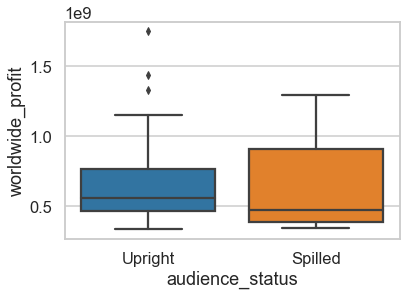

In [34]:
# fig, ax = plt.subplots(figsize = (20,10))

sns.boxplot(data = genre_cleaned_wwprofit, x = "audience_status", y = "worldwide_profit")

(0.0, 2000000.0)

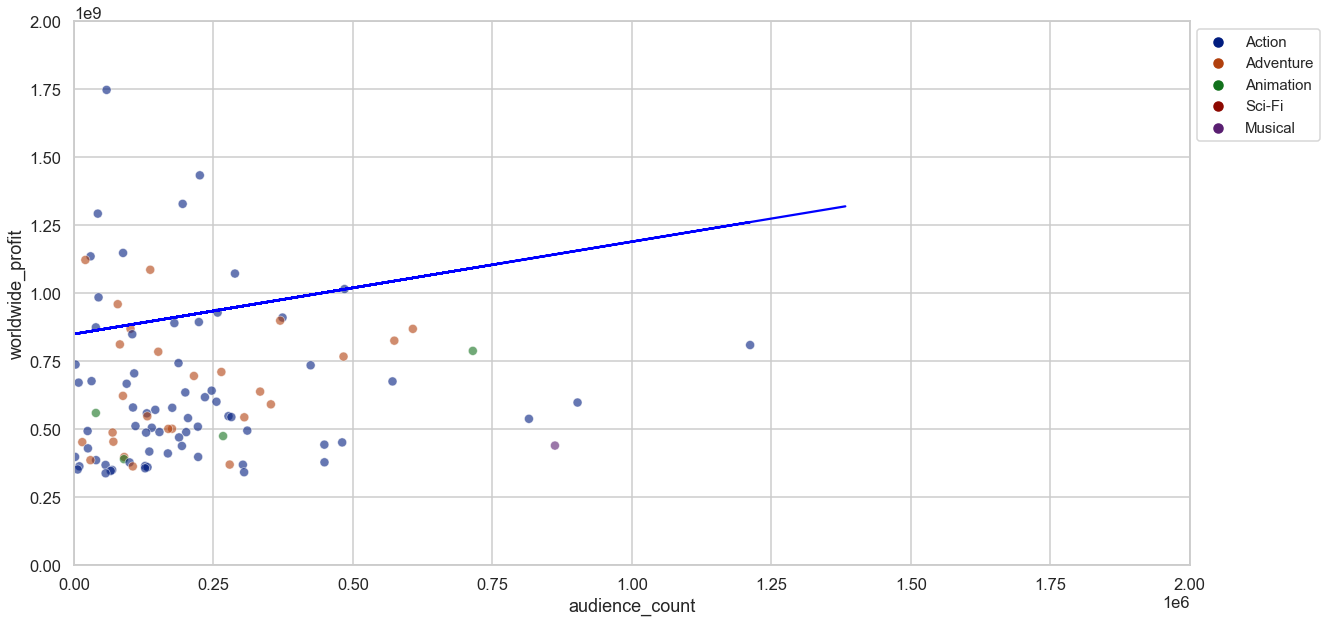

In [35]:
#RT amount of votes does have a positive relationship with profit
plt.figure(figsize=(20,10))
top_100_RT_profit_genre = sns.scatterplot(data=genre_cleaned_wwprofit, x="audience_count", y="worldwide_profit", hue="genre" ,palette="dark",alpha=0.6, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
# top_100_RT_profit_genre.set(title="Top 50 Total Profit Movies", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Worldwide Profits per Billion")
x = rotten_budget_df2["audience_count"]
y = rotten_budget_df2["worldwide_profit"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-")
plt.ylim(0, 2000000000)
plt.xlim(0, 2000000)

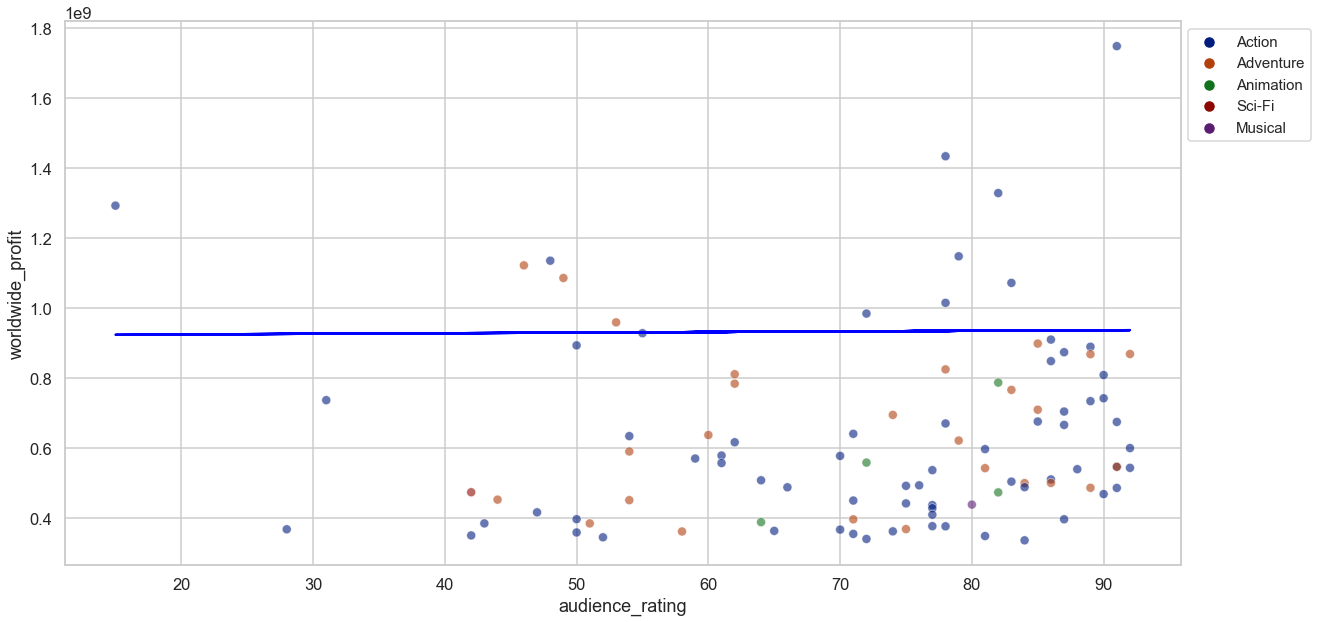

In [36]:
# Rating does not change how well the movie did
plt.figure(figsize=(20,10))
top_100_RT_profit_genre = sns.scatterplot(data=genre_cleaned_wwprofit, x="audience_rating", y="worldwide_profit", hue="genre" ,palette="dark",alpha=0.6, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
# top_100_RT_profit_genre.set(title="Top 50 Total Profit Movies", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Worldwide Profits per Billion")
x = rotten_budget_df2["audience_rating"]
y = rotten_budget_df2["worldwide_profit"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-")
# plt.ylim(0, 2000000000)
# plt.xlim(0, 2000000)

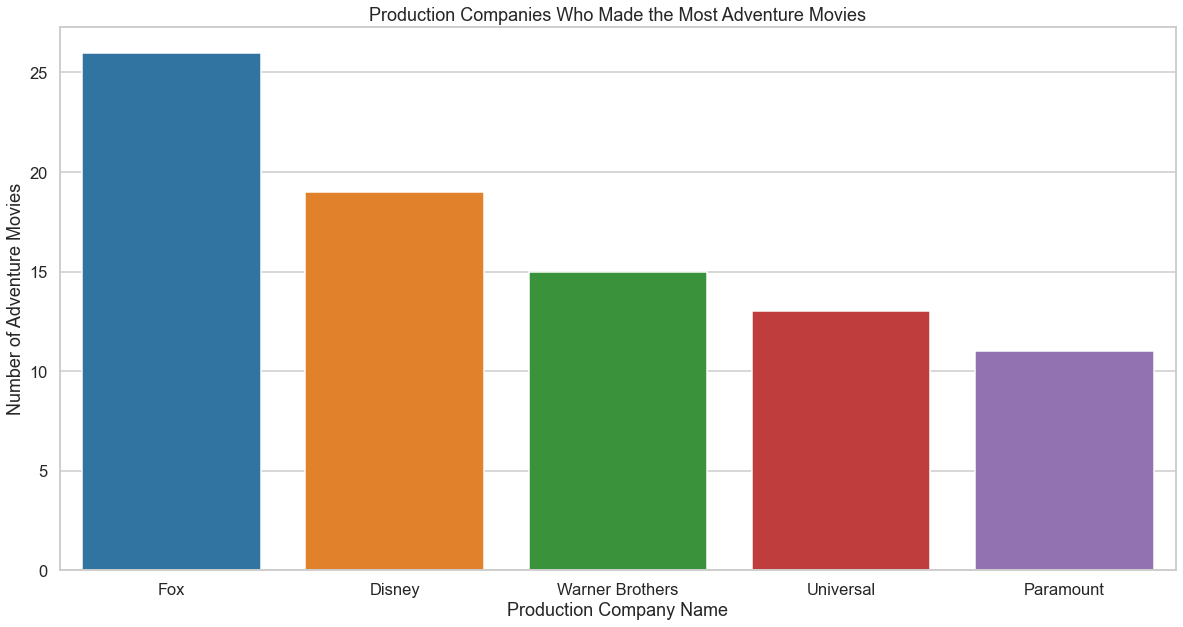

In [37]:
fig, ax = plt.subplots(figsize = (20,10))
Most_Adventure_PC = sns.barplot(x=top_5_adventure_pc.index, y=top_5_adventure_pc.values)
Most_Adventure_PC.set(title="Production Companies Who Made the Most Adventure Movies", xlabel="Production Company Name", ylabel="Number of Adventure Movies");
# plt.savefig('Production_Company_Most_Movies.png', dpi=300)

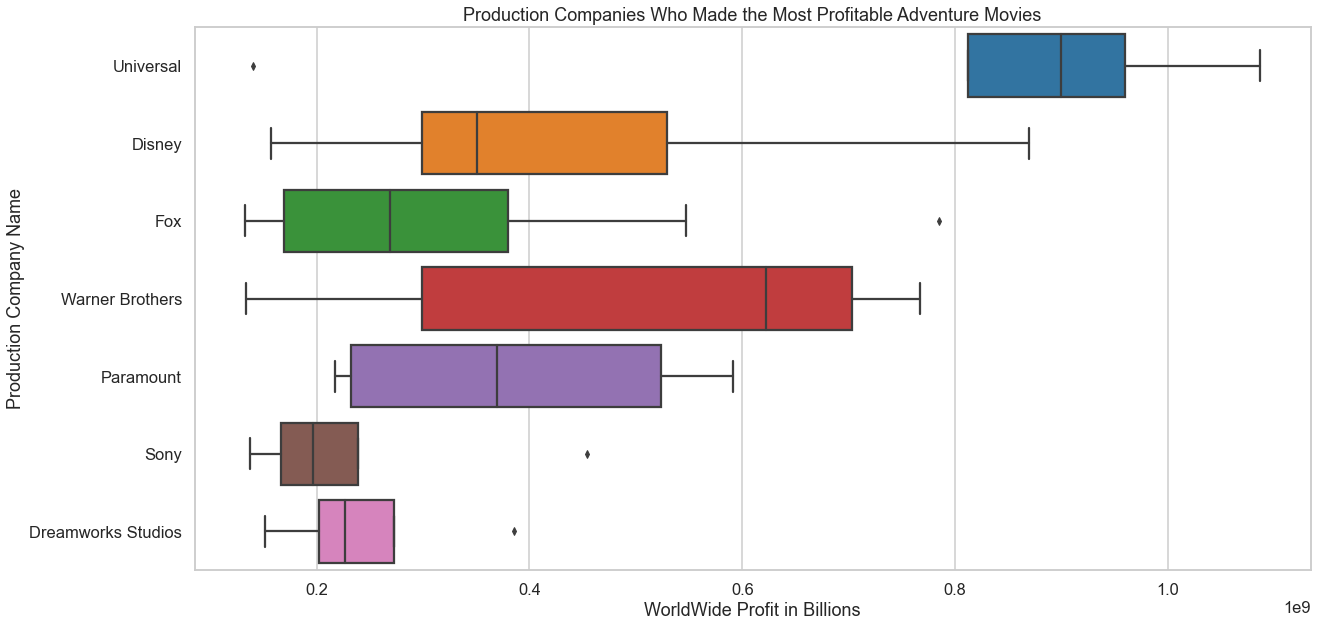

In [38]:
fig, ax = plt.subplots(figsize = (20,10))
# pc = pc_wwp["production_company"].apply(lambda x: x)
PC_Adventure_Profit=sns.boxplot(data = pc_wwp, y ="Production Company", x ="worldwide_profit")
PC_Adventure_Profit.set(title="Production Companies Who Made the Most Profitable Adventure Movies", xlabel="WorldWide Profit in Billions", ylabel="Production Company Name");
# plt.savefig('Production_Company_Profit.png', dpi=300)